In [3]:
import sys
!{sys.executable} -m pip install pandas seaborn matplotlib

  Using cached pandas-2.3.2-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.6-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached numpy-2.3.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.2-cp312-cp312-win_amd64.whl.metadata (111 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.3.0-cp312-cp312-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.3.2-cp312-cp312-win_amd64.whl (11.0 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.6-cp312-cp

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ret = pd.read_csv(r'C:/Users/k4d14/OneDrive/Desktop/Github-job/product-analytics-saas-cohorts-funnel/data/retention_matrix.csv')
ret.head()

len(ret)

11

In [35]:
ret.columns = ret.columns.str.strip().str.lower()
pivot = ret.pivot_table(
index='cohort_month',
columns='month_n',
values='retention_rate',
aggfunc='mean' # handles any duplicate keys safely
).fillna(0.0)
pivot.head() # preview the matrix

month_n,0,1,2
cohort_month,,,
2024-01,1.0,0.5,0.0
2024-02,1.0,0.5,0.0
2024-03,0.5,0.5,0.0
2024-04,1.0,0.5,0.0
2024-05,0.5,0.5,0.5


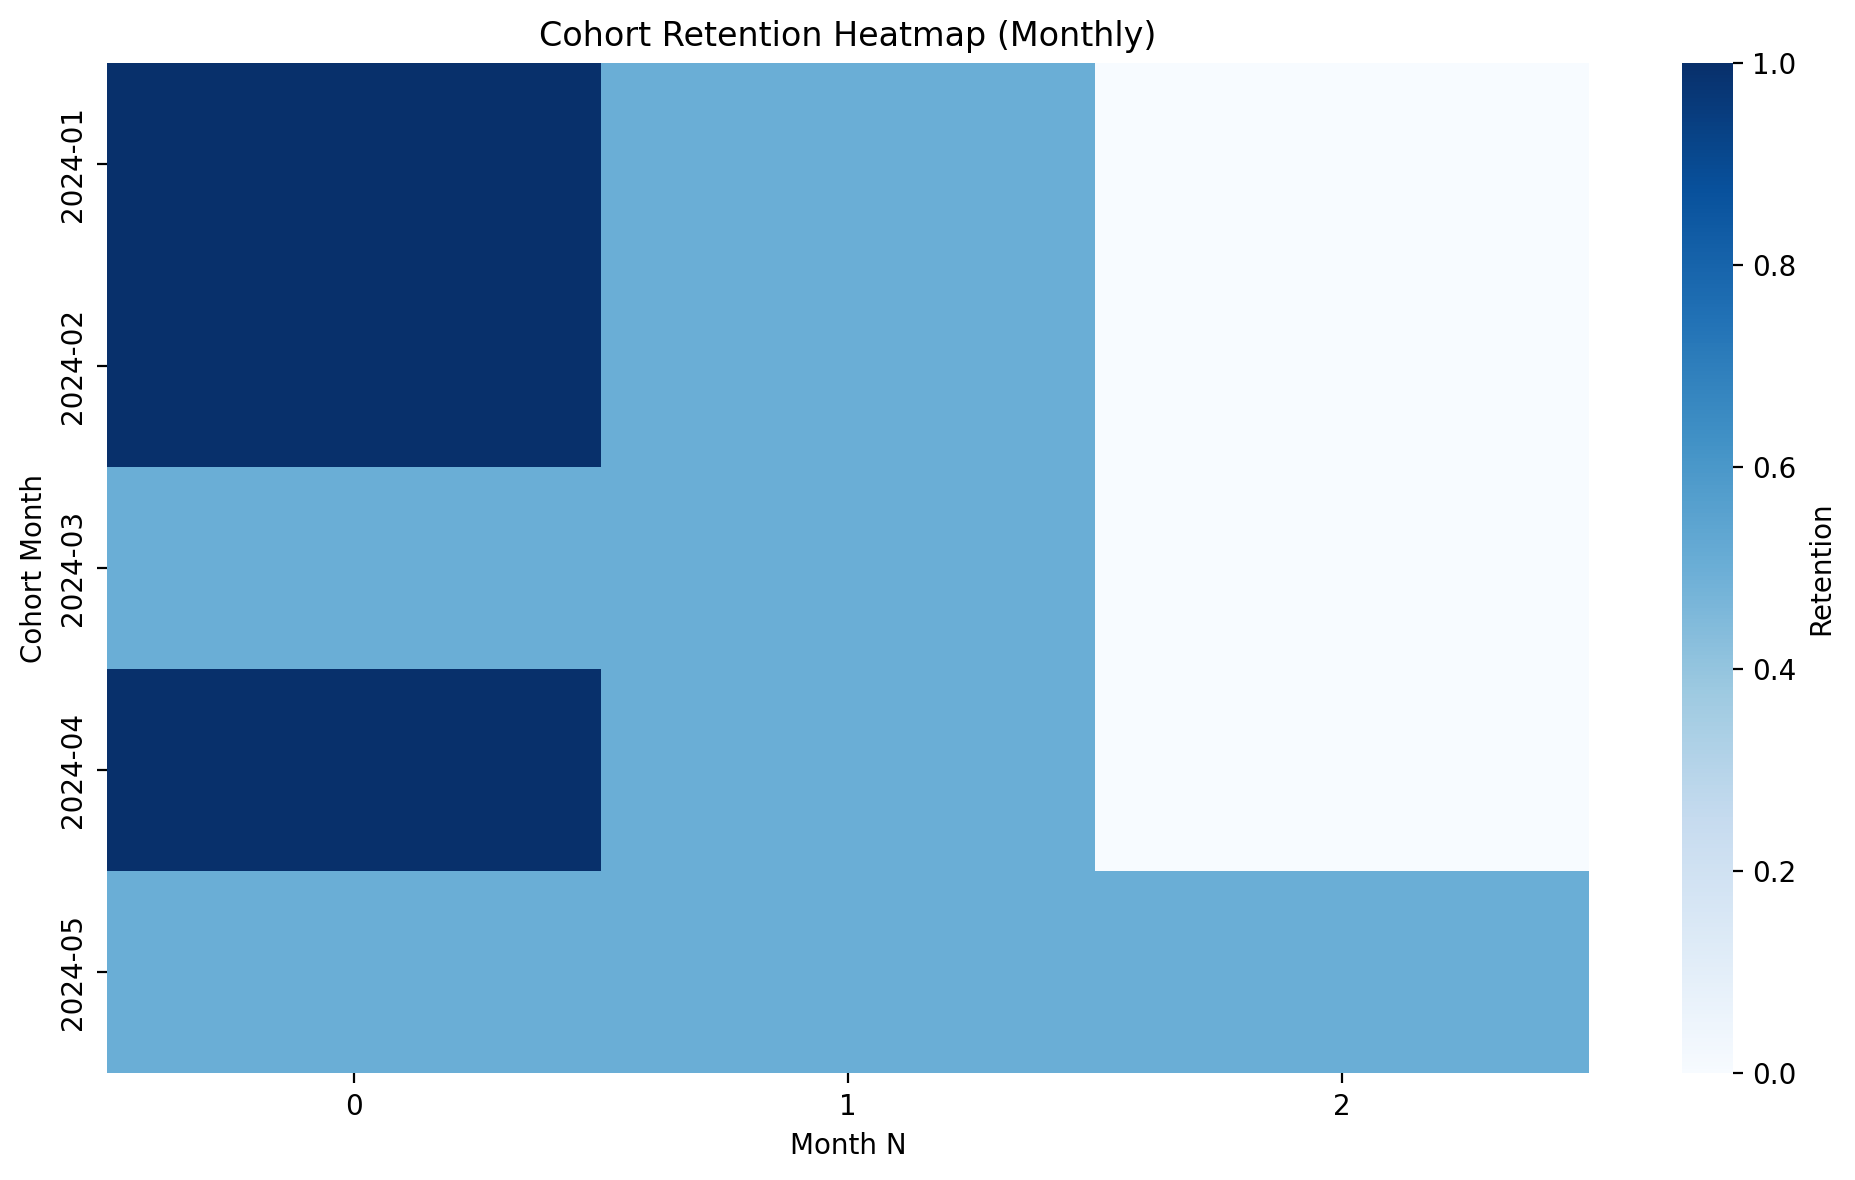

Saved to: C:/Users/k4d14/OneDrive/Desktop/Github-job/product-analytics-saas-cohorts-funnel\assets\retention_heatmap_v0.png


In [45]:
import os
repo = r"C:/Users/k4d14/OneDrive/Desktop/Github-job/product-analytics-saas-cohorts-funnel"
out = os.path.join(repo, "assets", "retention_heatmap_v0.png")
os.makedirs(os.path.dirname(out), exist_ok=True)

plt.figure(figsize=(10,6), dpi=200)
sns.heatmap(pivot, cmap='Blues', vmin=0, vmax=1, cbar_kws={'label':'Retention'})
plt.title('Cohort Retention Heatmap (Monthly)'); plt.ylabel('Cohort Month'); plt.xlabel('Month N')
plt.tight_layout(); plt.savefig(out, dpi=200); plt.show()

print("Saved to:", out)

In [38]:
m1 = ret[pd.to_numeric(ret['month_n'], errors='coerce') == 1]['retention_rate'].astype(float).mean()
print(f'Average M1 retention: {m1:.2%}')

Average M1 retention: 50.00%


In [41]:
import os, glob
print(glob.glob('assets/*'))

['assets\\retention_heatmap_v0.png']


In [43]:
import os, glob
print(glob.glob('assets/*'))

['assets\\retention_heatmap_v0.png']
